In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [4]:
data = pd.DataFrame(housing.data)
data.head(10)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [5]:
data.sample(10)

,0,1,2,3,4,5,6,7
10325,4.3269,13.0,5.926686,1.061584,1081.0,3.170088,33.79,-117.80
14005,4.7396,52.0,7.098246,1.056140,649.0,2.277193,32.76,-117.18
11268,3.6849,33.0,5.529611,1.084602,1704.0,2.883249,33.79,-117.97
8836,2.6713,28.0,3.879433,1.065603,1847.0,1.637411,34.08,-118.37
606,2.8512,43.0,5.545775,1.140845,740.0,2.605634,37.69,-122.08
18050,7.5980,21.0,6.562162,1.037838,500.0,2.702703,37.27,-121.99
7446,3.7361,35.0,5.734848,1.143939,474.0,3.590909,33.93,-118.16
3130,4.8750,1.0,5.533333,1.000000,32.0,2.133333,35.08,-117.95
7025,3.3942,36.0,3.811966,0.923077,410.0,3.504274,33.98,-118.11
18246,4.8036,4.0,3.924658,1.035959,1050.0,1.797945,37.39,-122.08


In [6]:
data.columns = housing.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
data['PRICE'] = housing.target 

In [8]:
data.shape

(20640, 9)

In [9]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [10]:
print('unique'.center(82,'~'))
print(data.nunique())
print('dataTypes'.center(82,'~'))
data.dtypes

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~unique~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~dataTypes~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [11]:
# Check for missing values so we drop that 
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [12]:
data[data.isnull().any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE


In [13]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
#  Finding out the correlation between the features
correlation = data.corr()
correlation.shape

(9, 9)

<Axes: >

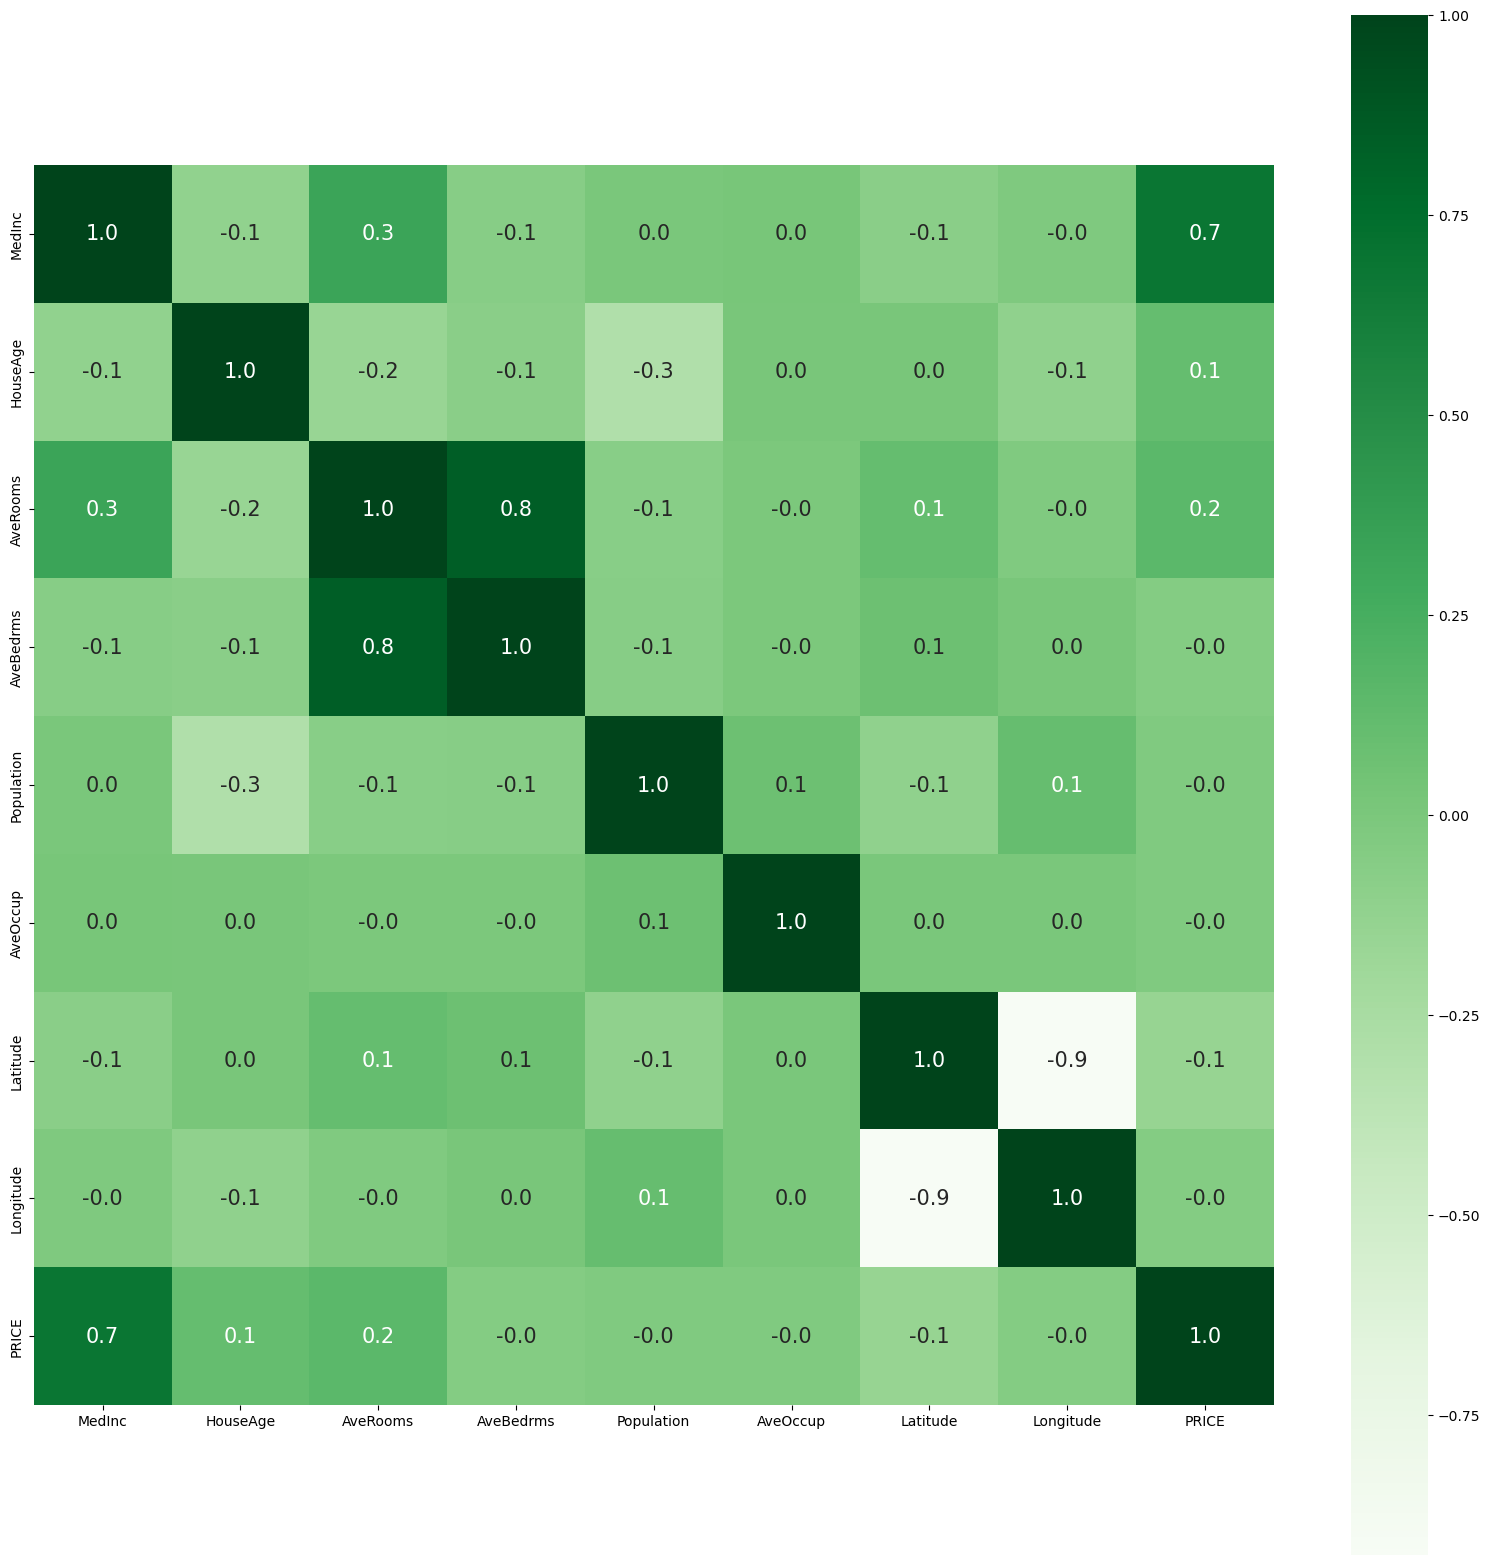

In [16]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [17]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [18]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# LINEAR REGRESSION

In [19]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# Value of y intercept
lm.intercept_

-36.9258842988459

In [21]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,MedInc,0.438284
1,HouseAge,0.009021
2,AveRooms,-0.113436
3,AveBedrms,0.648835
4,Population,-0.000008
5,AveOccup,-0.003978
6,Latitude,-0.421168
7,Longitude,-0.43468


In [22]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [23]:
print(''.center(82,'~'))
print('R^2:',metrics.r2_score(y_train, y_pred))

print(''.center(82,'~'))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

print(''.center(82,'~'))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))

print(''.center(82,'~'))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))

print(''.center(82,'~'))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print(''.center(82,'~'))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
R^2: 0.6081901093734017
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Adjusted R^2: 0.6079730251483852
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MAE: 0.5319076620403791
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE: 0.5258454910434389
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE: 0.7251520468449627
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


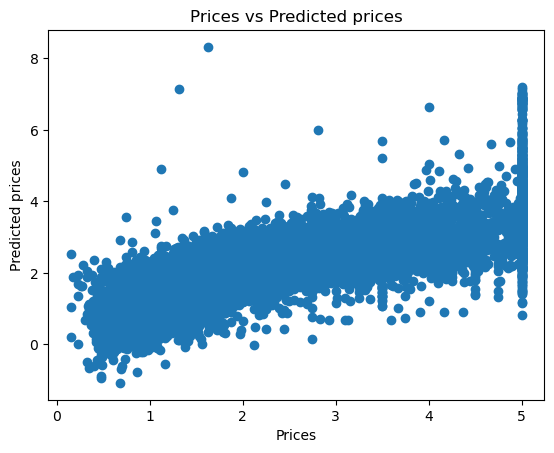

In [24]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

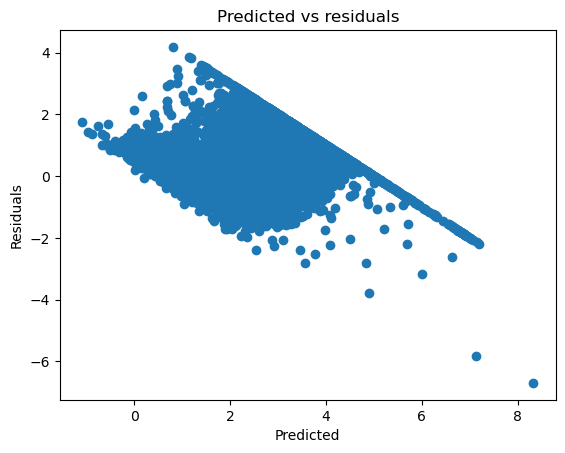

In [25]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/tmp/ipykernel_3972/3601695499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


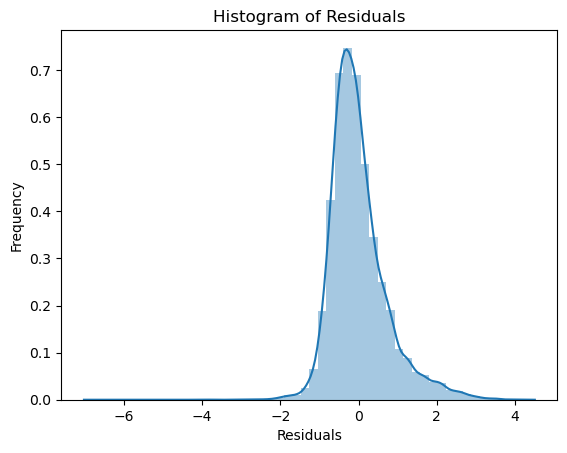

In [26]:
#  Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [37]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print(''.center(82,'~'))
print('R^2:', acc_linreg)
print(''.center(82,'~'))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(''.center(82,'~'))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print(''.center(82,'~'))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print(''.center(82,'~'))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
R^2: 0.8005069276103548
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Adjusted R^2: 0.800248809451028
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MAE: 0.3342163010012921
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE: 0.2606834236008918
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE: 0.5105716635310775



# RANDOM FOREST REGRESSOR

In [29]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
# Model prediction on train data
y_pred = reg.predict(X_train)


# Model Evaluation
print(''.center(82,'~'))
print('R^2:',metrics.r2_score(y_train, y_pred))
print(''.center(82,'~'))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(''.center(82,'~'))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print(''.center(82,'~'))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print(''.center(82,'~'))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
R^2: 0.9732568090136723
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Adjusted R^2: 0.9732419918152589
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MAE: 0.1226151720514954
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE: 0.03589186167246618
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE: 0.1894514757727323


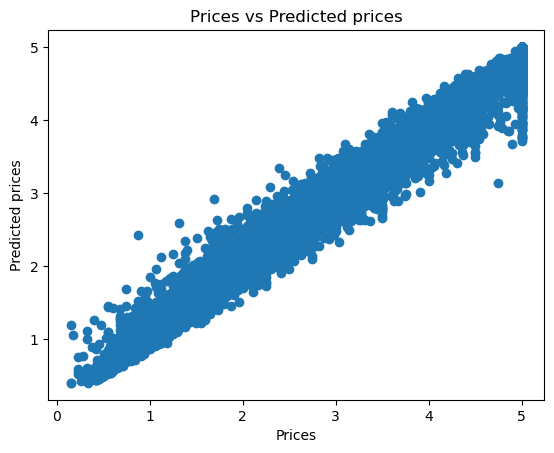

In [33]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

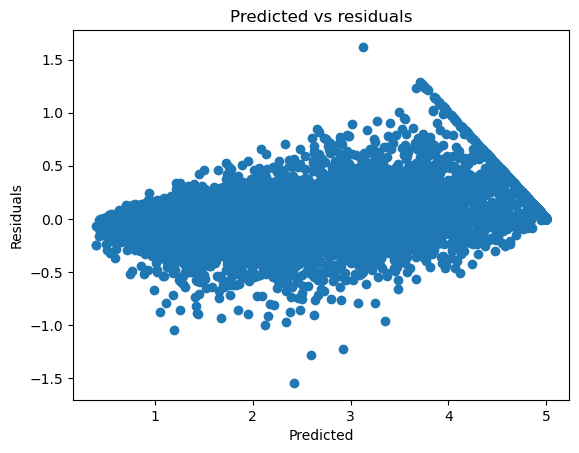

In [34]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [38]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)


# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print(''.center(82,'~'))
print('R^2:', acc_rf)
print(''.center(82,'~'))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(''.center(82,'~'))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print(''.center(82,'~'))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print(''.center(82,'~'))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
R^2: 0.8005069276103548
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Adjusted R^2: 0.800248809451028
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MAE: 0.3342163010012921
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE: 0.2606834236008918
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE: 0.5105716635310775


# SVM REGRESSOR

In [40]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [42]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

In [43]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [55]:
# Model Evaluation
print(''.center(82,'~'))
print('R^2:',metrics.r2_score(y_train, y_pred))
print(''.center(82,'~'))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(''.center(82,'~'))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print(''.center(82,'~'))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print(''.center(82,'~'))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
R^2: 0.7478602270878775
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Adjusted R^2: 0.7477205277885287
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MAE: 0.3847450385143313
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE: 0.33839513976157787
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE: 0.5817174054139844


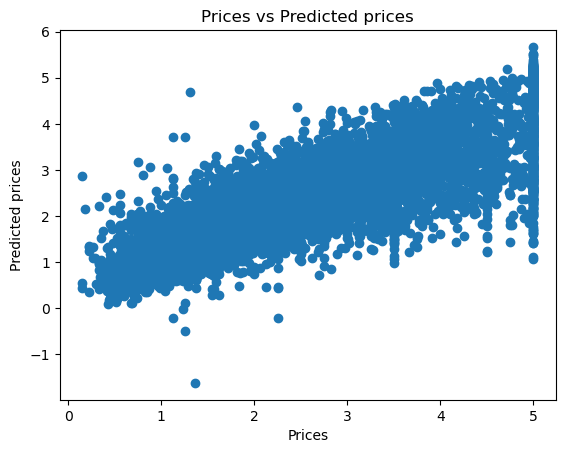

In [45]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

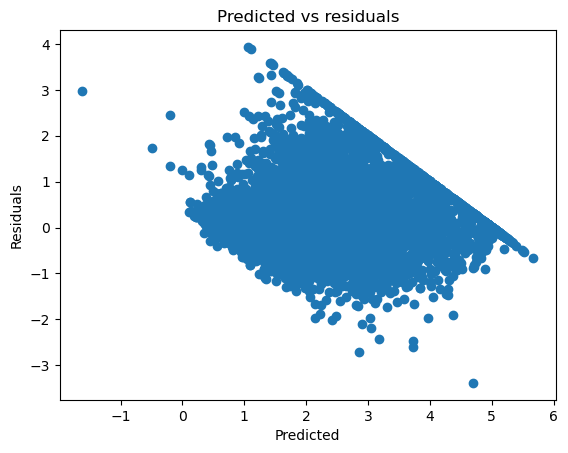

In [46]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [47]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [56]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)

print(''.center(82,'~'))
print('R^2:', acc_svm)
print(''.center(82,'~'))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(''.center(82,'~'))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print(''.center(82,'~'))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print(''.center(82,'~'))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
R^2: 0.7263792917547526
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Adjusted R^2: 0.7260252620497611
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MAE: 0.398389131637503
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE: 0.3575481701648011
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE: 0.5979533177136833


In [53]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)
models	

,Model,R-squared Score
0,Linear Regression,80.050693
1,Random Forest,80.050693
2,Support Vector Machines,72.637929


In [ ]:
# for this data the Random Forest works properly